# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [12]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:  # app_train[col].nunique()
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [16]:
app_train.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
SK_ID_CURR,1.000000,-0.002108,0.001654,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,...,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659,0.001368
TARGET,-0.002108,1.000000,-0.030896,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,...,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930,-0.045987
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241544,-0.185850,...,-0.005190,-0.007308,0.055821,0.000453,-0.005118,-0.015296,-0.014369,-0.021962,-0.052494,-0.054967
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141588,0.120310,...,0.002184,0.007299,0.006741,0.002669,0.000572,0.000242,0.020477,-0.009936,-0.036345,-0.154778
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.002817,1.000000,-0.002366,0.002934,-0.039270,-0.005225,-0.045537,...,-0.019364,-0.025130,-0.000173,-0.004120,-0.009267,0.007474,-0.004480,0.015451,0.067451,0.070107
CNT_CHILDREN,-0.001129,0.019187,0.029998,0.102023,-0.002366,1.000000,0.012882,0.002145,0.021374,-0.001827,...,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550,-0.240722
AMT_INCOME_TOTAL,-0.001820,-0.003982,-0.003531,0.083383,0.002934,0.012882,1.000000,0.156870,0.191657,0.159610,...,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690,-0.064038
AMT_CREDIT,-0.000343,-0.030369,-0.221648,0.116225,-0.039270,0.002145,0.156870,1.000000,0.770138,0.986968,...,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448,-0.065594
AMT_ANNUITY,-0.000433,-0.012817,-0.241544,0.141588,-0.005225,0.021374,0.191657,0.770138,1.000000,0.775109,...,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320,-0.103608
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.185850,0.120310,-0.045537,-0.001827,0.159610,0.986968,0.775109,1.000000,...,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998,-0.063569


In [17]:
app_train.cov()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
SK_ID_CURR,1.056582e+10,-5.904127e+01,4.990482e+01,59.220499,3.330996e+01,-8.381982e+01,-4.436777e+07,-1.419730e+07,-6.449708e+05,-8.802091e+06,...,4.192517e-01,2.482850e+00,5.313017e-01,-2.304033e+01,-2.497299e+01,4.417224e+01,45.722000,83.687998,895.504293,5.401335e+01
TARGET,-5.904127e+01,7.421192e-02,-2.470356e-03,-0.002820,-7.720918e-04,3.774480e-03,-2.572156e+02,-3.329871e+03,-5.060535e+01,-3.990170e+03,...,-9.018809e-06,1.321271e-06,1.848698e-05,2.082225e-05,7.994510e-05,4.303294e-05,-0.003047,-0.000429,0.009943,-4.813755e-03
NAME_CONTRACT_TYPE,4.990482e+01,-2.470356e-03,8.614765e-02,0.000559,9.088991e-03,6.357978e-03,-2.457358e+02,-2.618438e+04,-1.027557e+03,-2.007504e+04,...,-3.714986e-05,-4.830154e-05,2.998051e-04,1.107255e-05,-1.654126e-04,-9.136175e-04,-0.003841,-0.005089,-0.028634,-6.199202e-03
FLAG_OWN_CAR,5.922050e+01,-2.820022e-03,5.592443e-04,0.224435,-6.151070e-04,3.490231e-02,9.366926e+03,2.216152e+04,9.721968e+02,2.106180e+04,...,2.523562e-05,7.786130e-05,5.843342e-05,1.066103e-04,3.017212e-05,2.363773e-05,0.008935,-0.003758,-0.032362,-2.817518e-02
FLAG_OWN_REALTY,3.330996e+01,-7.720918e-04,9.088991e-03,-0.000615,2.124916e-01,-7.874294e-04,3.207247e+02,-7.286000e+03,-3.490913e+01,-7.755842e+03,...,-2.176908e-04,-2.608466e-04,-1.457816e-06,-1.597403e-04,-4.745975e-04,7.073495e-04,-0.001898,0.005673,0.058302,1.241769e-02
CNT_CHILDREN,-8.381982e+01,3.774480e-03,6.357978e-03,0.034902,-7.874294e-04,5.214593e-01,2.205820e+03,6.235671e+02,2.237060e+02,-4.874046e+02,...,1.521749e-05,1.606428e-05,-3.237726e-05,-2.492105e-05,-2.938695e-05,-3.618439e-04,-0.007184,-0.004515,-0.056364,-6.679400e-02
AMT_INCOME_TOTAL,-4.436777e+07,-2.572156e+02,-2.457358e+02,9366.926151,3.207247e+02,2.205820e+03,5.622739e+10,1.497168e+10,6.587001e+08,1.398799e+10,...,1.392615e+01,1.292048e+00,-2.554992e+00,1.477063e+01,8.099070e+01,1.213714e+02,5619.742206,958.417938,5427.589564,-5.834754e+03
AMT_CREDIT,-1.419730e+07,-3.329871e+03,-2.618438e+04,22161.522494,-7.286000e+03,6.235671e+02,1.497168e+10,1.619988e+11,4.492695e+09,1.467708e+11,...,2.069314e+02,2.811662e+02,-1.189319e+02,-1.325779e+02,1.899996e+02,-1.056284e+02,20190.890033,5119.011266,-36660.699977,-1.014456e+04
AMT_ANNUITY,-6.449708e+05,-5.060535e+01,-1.027557e+03,972.196828,-3.490913e+01,2.237060e+02,6.587001e+08,4.492695e+09,2.100684e+08,4.150001e+09,...,1.616435e+00,3.824309e+00,-4.667345e+00,4.659010e+00,3.483036e+00,4.087934e+01,516.022963,115.677189,-304.483954,-5.770226e+02
AMT_GOODS_PRICE,-8.802091e+06,-3.990170e+03,-2.007504e+04,21061.796285,-7.755842e+03,-4.874046e+02,1.398799e+10,1.467708e+11,4.150001e+09,1.364907e+11,...,1.827920e+02,2.633309e+02,-9.702120e+01,-1.008204e+02,1.924912e+02,-7.655799e+01,19203.110188,4847.839544,-35413.554555,-9.025993e+03


### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [20]:
# 觀察相關係數
s = app_train.corr()['TARGET']

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [22]:
s.sort_values().iloc[:15] # 相關性最小15個

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

In [23]:
s.sort_values(ascending=False).iloc[:15] # 相關性最大15個

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

Text(0, 0.5, 'TARGET')

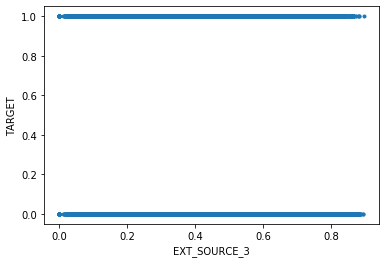

In [24]:
plt.plot(app_train['EXT_SOURCE_3'], app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')

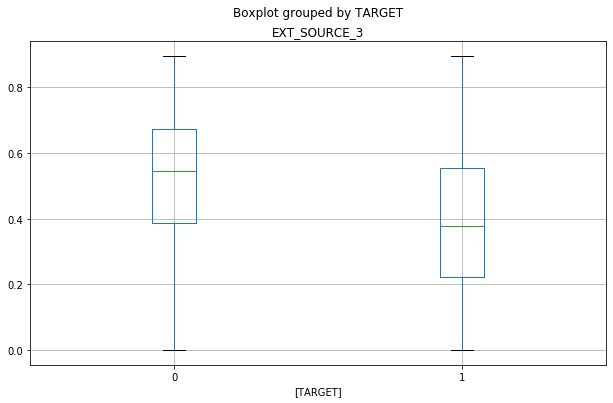

In [26]:
app_train.boxplot(column=['EXT_SOURCE_3'], by=['TARGET'], figsize=(10, 6))

Text(0, 0.5, 'TARGET')

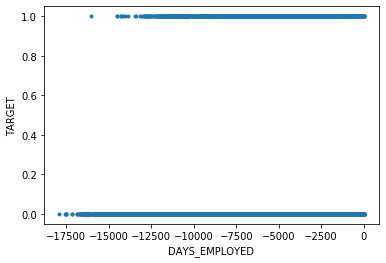

In [27]:
plt.plot(app_train['DAYS_EMPLOYED'], app_train['TARGET'], '.')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('TARGET')

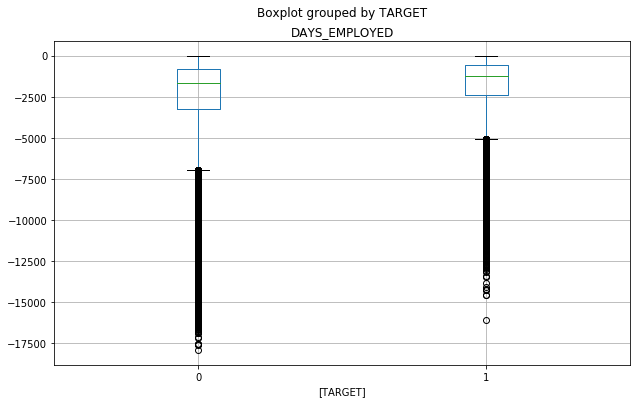

In [28]:
app_train.boxplot(column=['DAYS_EMPLOYED'], by=['TARGET'], figsize=(10, 6))